# Journey Data Attrition Analysis -- one hot encoded feature
### Ting Sun -- Oct, 2019

In [20]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [21]:
import gc
gc.collect()

7

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve

In [24]:
from tpot import TPOTClassifier


In [25]:
import pandas_profiling as pandprof

In [26]:
import matplotlib.pyplot as plt
#import scikitplot as skplt
from sklearn import metrics

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
import csv

In [29]:
from sklearn.tree import  plot_tree

In [30]:
univ=pd.read_csv('..\jrn_7day_trspd_recd_50_rev.csv', encoding='utf-8',sep=",")

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
univ.head()

,OCIF_id,attrited,mob002,mob024,mob027,mob043,mob053,mob070,mob080,mob081,...,trn064,act097,trn078,trn024,sr058,sr128,sr358,sr214,sr011,sr471
0,0-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,001069464216288,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,001069464307179,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,001069464309050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001069464634763,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
import tensorflow as tf

In [15]:
#tf.__version__

AttributeError: module 'tensorflow' has no attribute '__version__'

In [5]:
#!pip install keras

  ERROR: Could not find a version that satisfies the requirement keras (from versions: none)
ERROR: No matching distribution found for keras


In [19]:
#from tensorflow import keras

In [16]:
from tensorflow.python.keras.layers import Input, Dense, Dropout
from tensorflow.python.keras.models import Model, load_model


C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:

from tensorflow.python.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.python.keras import regularizers, Sequential

## create profile report


In [38]:
#pandasreport=pandprof.ProfileReport(univ)

In [39]:
#pandasreport.to_file("Sequence_OneHotEnc_Quick_EDA_rev.html")

## Data Exploration

In [18]:
# check data to see whether it needs to be scaled (change the range of data) or normalized (change the distribution of data). 
#train test split


In [12]:
univ.isnull().sum().max()

0

In [15]:
univ['attrited'].value_counts()

0    4337337
1       6913
Name: attrited, dtype: int64

In [13]:
# The classes are heavily skewed we need to solve this issue later.
print('Not Attrited', round(univ['attrited'].value_counts()[0]/len(univ) * 100,2), '% of the dataset')
print('Attrited', round(univ['attrited'].value_counts()[1]/len(univ) * 100,2), '% of the dataset')

Not Attrited 99.84 % of the dataset
Attrited 0.16 % of the dataset


Text(0.5,1,'Class Distributions \n (0: Not Attrited || 1: Attrited)')

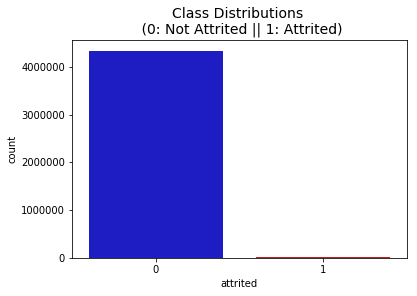

In [14]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('attrited', data=univ, palette=colors)
plt.title('Class Distributions \n (0: Not Attrited || 1: Attrited)', fontsize=14)

In [ ]:
# random undersampling

In [16]:
univ = univ.sample(frac=1)

In [17]:
univ['attrited'].value_counts()

0    4337337
1       6913
Name: attrited, dtype: int64

In [18]:
# amount of fraud classes 492 rows.
attr_df = univ.loc[univ['attrited'] == 1]
non_attr_df = univ.loc[univ['attrited'] == 0][:6913]

In [19]:
normal_distributed_df = pd.concat([attr_df, non_attr_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,OCIF_id,attrited,mob002,mob024,mob027,mob043,mob053,mob070,mob080,mob081,...,trn064,act097,trn078,trn024,sr058,sr128,sr358,sr214,sr011,sr471
208704,110164385613500,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2186436,424038537845600,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3286297,715043476378500,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4173602,917268545899900,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3853111,822175000680400,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Correlation Matrices

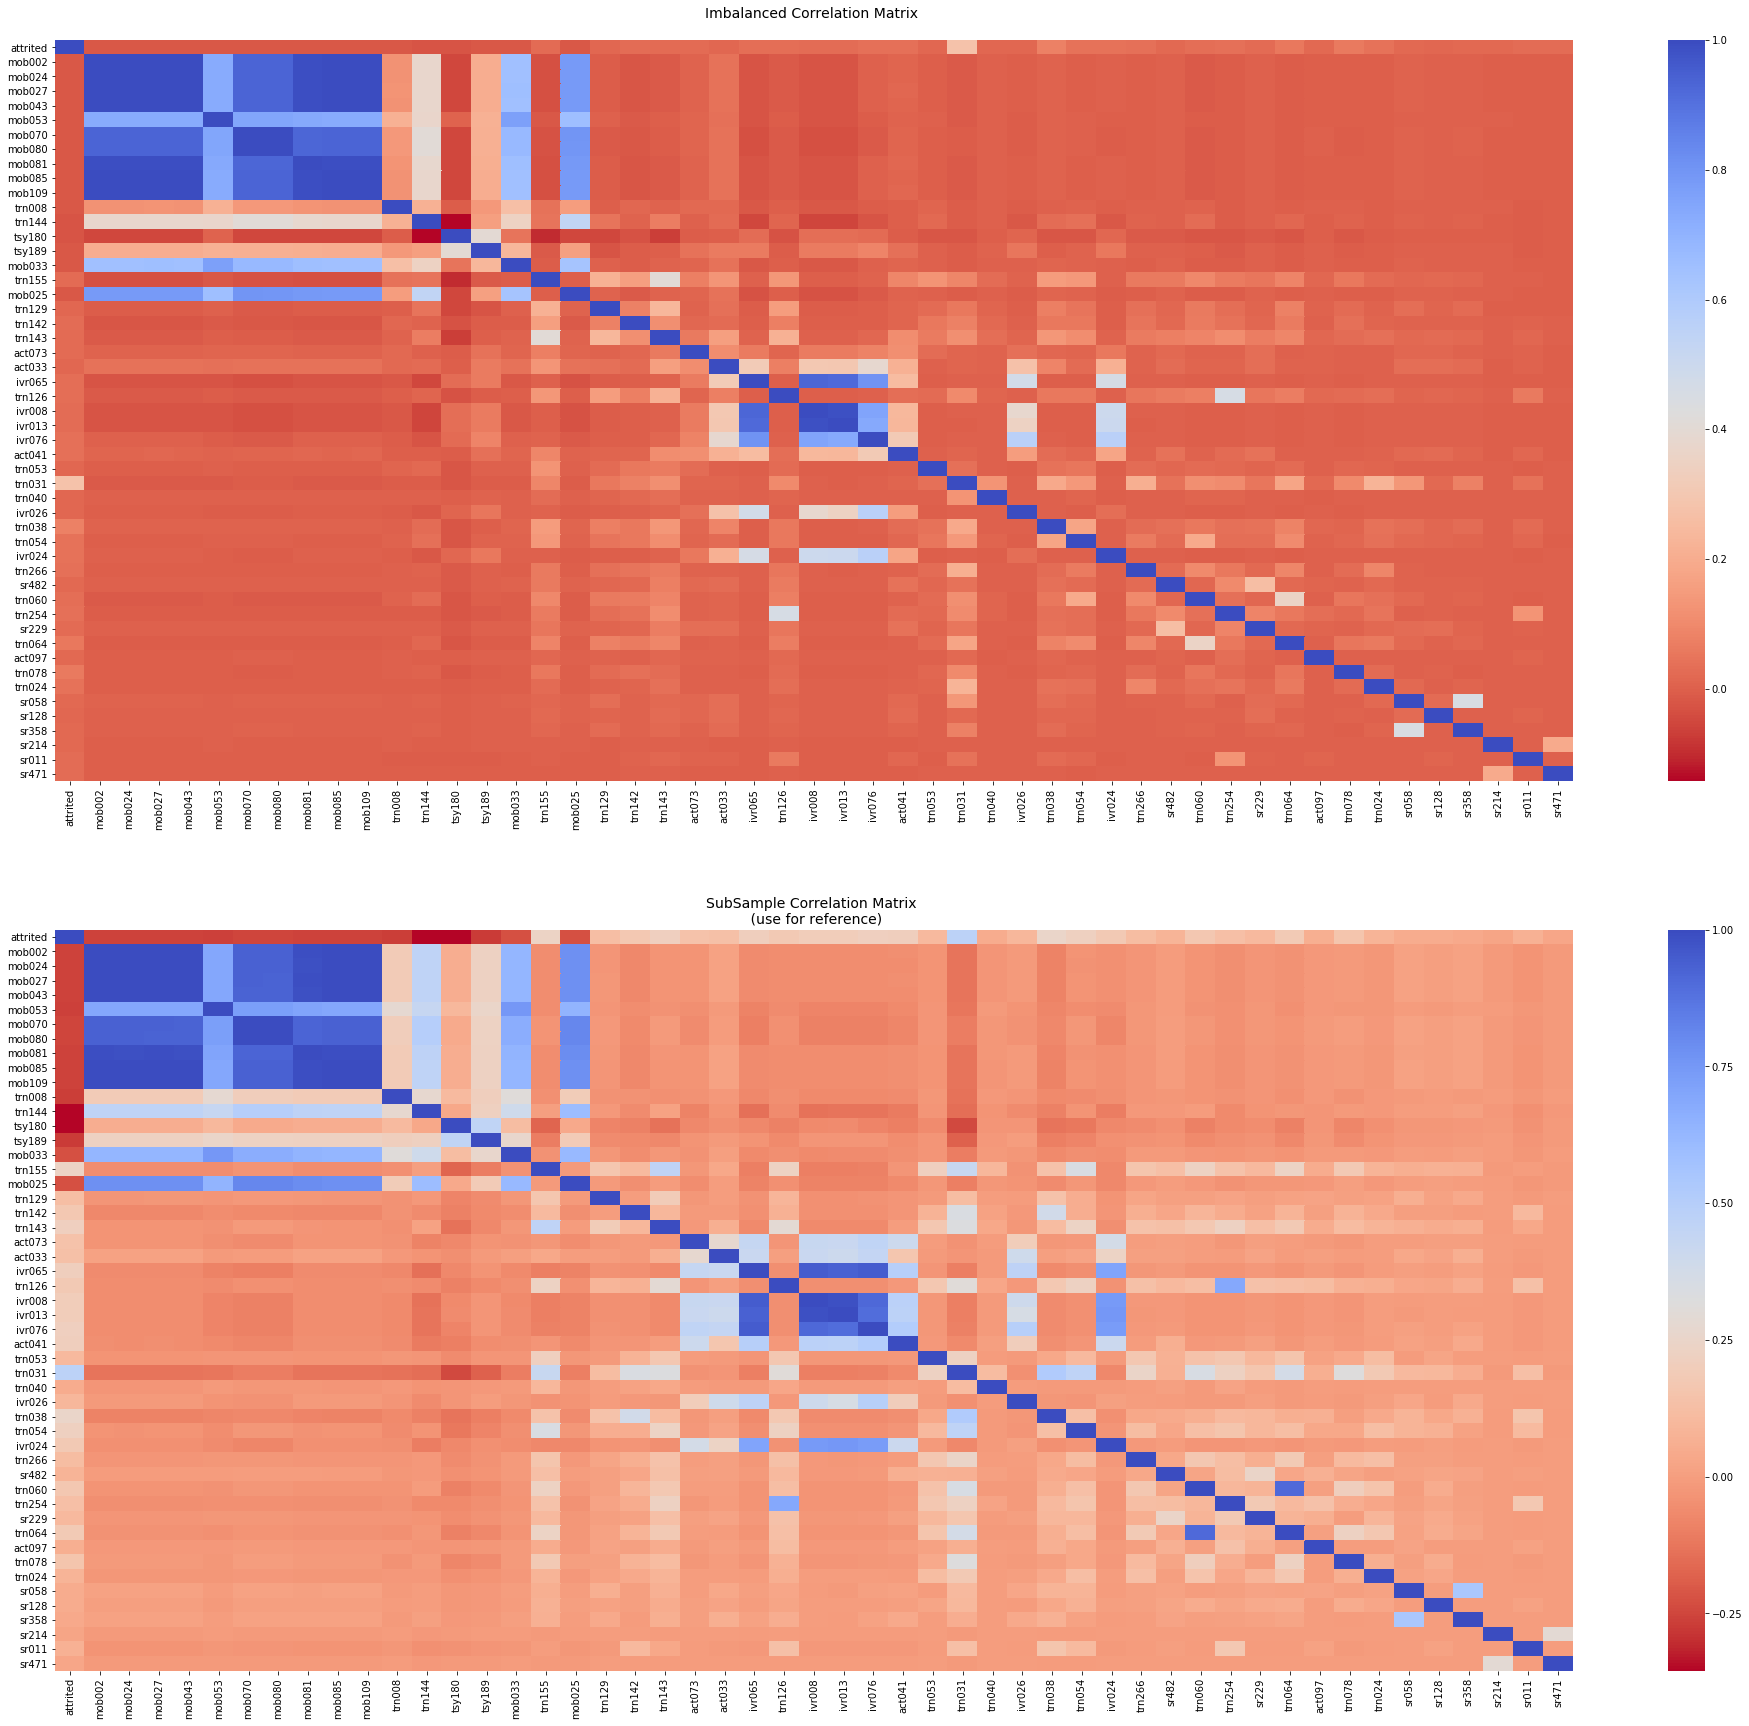

In [20]:

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(34,30))

# Entire DataFrame
corr = univ.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n ", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [21]:
new_df.shape

(13826, 52)

In [ ]:
# train_test split:
#training_data, testing_data = train_test_split(new_df, test_size=0.2, random_state = 22)

In [22]:
y=new_df['attrited']

In [23]:
X=new_df.loc[:, (new_df.columns != 'attrited') & (new_df.columns != 'OCIF_id') ]

In [24]:
X.head()

,mob002,mob024,mob027,mob043,mob053,mob070,mob080,mob081,mob085,mob109,...,trn064,act097,trn078,trn024,sr058,sr128,sr358,sr214,sr011,sr471
208704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2186436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3286297,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4173602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3853111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
#simple logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [28]:
type(X_train)

pandas.core.frame.DataFrame

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regresbsion classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regresbsion classifier on test set: 0.81


In [31]:
y_test.value_counts()

0    2113
1    2035
Name: attrited, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
print(confusion_matrix(y_test, y_pred))

[[1625  488]
 [ 295 1740]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      2113
           1       0.78      0.86      0.82      2035

    accuracy                           0.81      4148
   macro avg       0.81      0.81      0.81      4148
weighted avg       0.81      0.81      0.81      4148



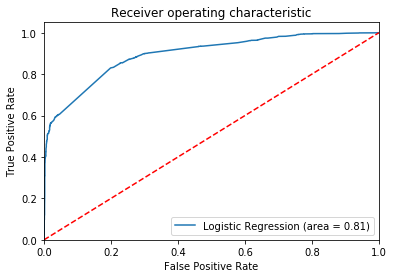

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [39]:
import statsmodels.api as sm

In [41]:
'''
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())
'''

'\nlogit_model=sm.Logit(y_train,X_train)\nresult=logit_model.fit()\nprint(result.summary2())\n'

## remove vars that are highly correlated from base dataframe based on profile report

In [33]:
univ.shape

(4344250, 52)

In [34]:
import gc
gc.collect()

18

In [35]:
univ1=univ.drop(['mob024','ivr008','mob027','mob043','mob070','mob080','mob085'], axis = 1) 

In [36]:
univ1.head()

,OCIF_id,attrited,mob002,mob053,mob081,mob109,trn008,trn144,tsy180,tsy189,...,trn064,act097,trn078,trn024,sr058,sr128,sr358,sr214,sr011,sr471
0,0-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,001069464216288,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,001069464307179,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,001069464309050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001069464634763,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## smote oversampling 

In [42]:
os = SMOTE(random_state=9)

In [43]:
smoteY=univ1['attrited']

In [44]:
smoteX=univ1.loc[:, (univ1.columns != 'attrited') & (univ1.columns != 'OCIF_id') ]

In [45]:
smoteX.head()

,mob002,mob053,mob081,mob109,trn008,trn144,tsy180,tsy189,mob033,trn155,...,trn064,act097,trn078,trn024,sr058,sr128,sr358,sr214,sr011,sr471
1022205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3039789,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3965035,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
sX_train, sX_test, sy_train, sy_test = train_test_split(smoteX, smoteY, test_size=0.3, random_state=8)

In [47]:
os_data_X,os_data_y=os.fit_sample(sX_train, sy_train)


In [48]:
sX_test.shape

(1303275, 43)

In [49]:
sX_train.shape

(3040975, 43)

In [50]:
columns = sX_train.columns

In [51]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [52]:
os_data_y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [53]:
os_data_y['y'].value_counts()

1    3036117
0    3036117
Name: y, dtype: int64

In [ ]:
## we now have balanced training dataset. we can do Recursive Feature Elimination (RFE)


In [112]:
#from sklearn.feature_selection import RFE

In [ ]:
#logreg = LogisticRegression()

In [113]:
#rfe = RFE(logreg, 30)

In [45]:
#rfe1 = rfe.fit(os_data_X,os_data_y)

In [76]:
#print(rfe1.ranking_)

In [75]:
#rfe.support_

In [122]:
#fncol=os_data_X.columns[rfe.support_]

In [124]:
#find the most significant 30 columns. and drop the other 14. 

#os_data_X1 = pd.DataFrame(data=os_data_X,columns=fncol )

In [125]:
#os_data_X1.shape

(1399862, 30)

In [126]:
#logit_model=sm.Logit(os_data_y,os_data_X1)


In [46]:
#result=logit_model.fit()
#print(result.summary2())

In [ ]:
# p values are all significant. we are good to go. 

## Auto Encoder Model

In [55]:
univ=univ1.head(1000000).drop(['OCIF_id'], axis=1)

In [19]:
import gc
gc.collect()

233

In [56]:
# split the data 70/30, training to testing
train_x, test_x = train_test_split(univ, test_size=0.3, random_state=10)

# take out the attrited transactions from training data
attri_df = train_x[train_x.attrited == 1]
# keep only normal transaction data in training set
train_x = train_x[train_x.attrited == 0]
# drop the class column (labels) from training set
train_x = train_x.drop(['attrited'], axis=1)

# create labels for test data
test_y = test_x['attrited']
# drop the labels from test data itself
test_x = test_x.drop(['attrited'], axis=1)

# transform to ndarray
train_x = train_x.values
test_x = test_x.values

In [57]:
# take out labels from remaining fraud data (taken out from training set)
attri_y = attri_df['attrited']
attri_x = attri_df.drop(['attrited'], axis=1).values

# extend test data and label with additional attri. data
test_x_extended = np.concatenate((attri_x, test_x), axis=0)
test_y_extended = pd.concat([attri_y, test_y])

In [58]:
# model train
nb_epoch = 100
batch_size = 128
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

In [59]:
attri_df.head()

,attrited,mob002,mob053,mob081,mob109,trn008,trn144,tsy180,tsy189,mob033,...,trn064,act097,trn078,trn024,sr058,sr128,sr358,sr214,sr011,sr471
568217,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
954663,1,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
173634,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
866376,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558181,1,1,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:


input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [61]:
train_x[0]

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [62]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_attr.h5",
                               save_best_only=True,
                               verbose=0)

history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x),
                    verbose=1,
                    callbacks=[cp]).history

Train on 699267 samples, validate on 300000 samples
Epoch 1/100
526208/699267 [=====================>........] - ETA: 26:50 - loss: 0.0668 - acc: 0.20 - ETA: 1:38 - loss: 0.0680 - acc: 0.1225 - ETA: 54s - loss: 0.0640 - acc: 0.193 - ETA: 41s - loss: 0.0598 - acc: 0.24 - ETA: 35s - loss: 0.0561 - acc: 0.28 - ETA: 31s - loss: 0.0522 - acc: 0.33 - ETA: 28s - loss: 0.0484 - acc: 0.37 - ETA: 25s - loss: 0.0448 - acc: 0.41 - ETA: 24s - loss: 0.0420 - acc: 0.43 - ETA: 22s - loss: 0.0396 - acc: 0.45 - ETA: 21s - loss: 0.0378 - acc: 0.45 - ETA: 20s - loss: 0.0363 - acc: 0.45 - ETA: 20s - loss: 0.0349 - acc: 0.45 - ETA: 19s - loss: 0.0338 - acc: 0.46 - ETA: 18s - loss: 0.0326 - acc: 0.46 - ETA: 18s - loss: 0.0316 - acc: 0.46 - ETA: 18s - loss: 0.0308 - acc: 0.47 - ETA: 17s - loss: 0.0298 - acc: 0.47 - ETA: 17s - loss: 0.0290 - acc: 0.47 - ETA: 17s - loss: 0.0283 - acc: 0.47 - ETA: 16s - loss: 0.0275 - acc: 0.47 - ETA: 16s - loss: 0.0270 - acc: 0.47 - ETA: 16s - loss: 0.0263 - acc: 0.48 - ETA: 16

508032/699267 [====================>.........] - ETA: 3:39 - loss: 0.0020 - acc: 0.648 - ETA: 22s - loss: 0.0037 - acc: 0.538 - ETA: 18s - loss: 0.0035 - acc: 0.50 - ETA: 17s - loss: 0.0035 - acc: 0.49 - ETA: 17s - loss: 0.0036 - acc: 0.50 - ETA: 16s - loss: 0.0035 - acc: 0.49 - ETA: 15s - loss: 0.0035 - acc: 0.51 - ETA: 15s - loss: 0.0035 - acc: 0.51 - ETA: 15s - loss: 0.0035 - acc: 0.51 - ETA: 15s - loss: 0.0035 - acc: 0.50 - ETA: 15s - loss: 0.0036 - acc: 0.50 - ETA: 14s - loss: 0.0036 - acc: 0.50 - ETA: 14s - loss: 0.0036 - acc: 0.49 - ETA: 14s - loss: 0.0036 - acc: 0.50 - ETA: 14s - loss: 0.0036 - acc: 0.50 - ETA: 14s - loss: 0.0036 - acc: 0.50 - ETA: 14s - loss: 0.0036 - acc: 0.50 - ETA: 15s - loss: 0.0036 - acc: 0.50 - ETA: 15s - loss: 0.0036 - acc: 0.50 - ETA: 15s - loss: 0.0036 - acc: 0.50 - ETA: 15s - loss: 0.0035 - acc: 0.50 - ETA: 15s - loss: 0.0035 - acc: 0.50 - ETA: 15s - loss: 0.0035 - acc: 0.50 - ETA: 15s - loss: 0.0036 - acc: 0.50 - ETA: 15s - loss: 0.0036 - acc: 0.50 

699267/699267 [==============================] - ETA: 4s - loss: 0.0035 - acc: 0.526 - ETA: 4s - loss: 0.0035 - acc: 0.526 - ETA: 3s - loss: 0.0035 - acc: 0.526 - ETA: 3s - loss: 0.0035 - acc: 0.527 - ETA: 3s - loss: 0.0034 - acc: 0.527 - ETA: 3s - loss: 0.0034 - acc: 0.527 - ETA: 3s - loss: 0.0034 - acc: 0.527 - ETA: 3s - loss: 0.0034 - acc: 0.527 - ETA: 3s - loss: 0.0034 - acc: 0.527 - ETA: 3s - loss: 0.0034 - acc: 0.526 - ETA: 3s - loss: 0.0034 - acc: 0.526 - ETA: 3s - loss: 0.0034 - acc: 0.526 - ETA: 3s - loss: 0.0034 - acc: 0.526 - ETA: 3s - loss: 0.0034 - acc: 0.527 - ETA: 3s - loss: 0.0034 - acc: 0.526 - ETA: 3s - loss: 0.0034 - acc: 0.526 - ETA: 3s - loss: 0.0034 - acc: 0.526 - ETA: 3s - loss: 0.0034 - acc: 0.525 - ETA: 3s - loss: 0.0034 - acc: 0.525 - ETA: 2s - loss: 0.0034 - acc: 0.525 - ETA: 2s - loss: 0.0034 - acc: 0.526 - ETA: 2s - loss: 0.0034 - acc: 0.526 - ETA: 2s - loss: 0.0034 - acc: 0.526 - ETA: 2s - loss: 0.0034 - acc: 0.525 - ETA: 2s - loss: 0.0034 - acc: 0.525 - E

300800/699267 [===========>..................] - ETA: 7:01 - loss: 0.0027 - acc: 0.625 - ETA: 1:27 - loss: 0.0032 - acc: 0.574 - ETA: 45s - loss: 0.0028 - acc: 0.587 - ETA: 37s - loss: 0.0030 - acc: 0.57 - ETA: 41s - loss: 0.0029 - acc: 0.57 - ETA: 40s - loss: 0.0030 - acc: 0.57 - ETA: 39s - loss: 0.0030 - acc: 0.57 - ETA: 38s - loss: 0.0030 - acc: 0.58 - ETA: 35s - loss: 0.0031 - acc: 0.58 - ETA: 36s - loss: 0.0031 - acc: 0.58 - ETA: 35s - loss: 0.0031 - acc: 0.58 - ETA: 37s - loss: 0.0031 - acc: 0.58 - ETA: 37s - loss: 0.0030 - acc: 0.58 - ETA: 38s - loss: 0.0030 - acc: 0.58 - ETA: 36s - loss: 0.0030 - acc: 0.58 - ETA: 36s - loss: 0.0030 - acc: 0.58 - ETA: 36s - loss: 0.0030 - acc: 0.58 - ETA: 35s - loss: 0.0030 - acc: 0.58 - ETA: 33s - loss: 0.0030 - acc: 0.58 - ETA: 32s - loss: 0.0030 - acc: 0.58 - ETA: 33s - loss: 0.0030 - acc: 0.58 - ETA: 33s - loss: 0.0030 - acc: 0.58 - ETA: 32s - loss: 0.0030 - acc: 0.58 - ETA: 31s - loss: 0.0030 - acc: 0.58 - ETA: 31s - loss: 0.0030 - acc: 0.5

699267/699267 [==============================] - ETA: 15s - loss: 0.0029 - acc: 0.59 - ETA: 15s - loss: 0.0029 - acc: 0.59 - ETA: 15s - loss: 0.0029 - acc: 0.59 - ETA: 15s - loss: 0.0029 - acc: 0.59 - ETA: 15s - loss: 0.0029 - acc: 0.59 - ETA: 15s - loss: 0.0029 - acc: 0.59 - ETA: 15s - loss: 0.0029 - acc: 0.59 - ETA: 14s - loss: 0.0029 - acc: 0.59 - ETA: 14s - loss: 0.0029 - acc: 0.59 - ETA: 14s - loss: 0.0029 - acc: 0.59 - ETA: 14s - loss: 0.0029 - acc: 0.59 - ETA: 14s - loss: 0.0029 - acc: 0.59 - ETA: 14s - loss: 0.0029 - acc: 0.59 - ETA: 14s - loss: 0.0029 - acc: 0.59 - ETA: 14s - loss: 0.0029 - acc: 0.59 - ETA: 13s - loss: 0.0029 - acc: 0.59 - ETA: 13s - loss: 0.0029 - acc: 0.59 - ETA: 13s - loss: 0.0029 - acc: 0.59 - ETA: 13s - loss: 0.0029 - acc: 0.59 - ETA: 13s - loss: 0.0029 - acc: 0.59 - ETA: 13s - loss: 0.0029 - acc: 0.59 - ETA: 13s - loss: 0.0029 - acc: 0.59 - ETA: 13s - loss: 0.0029 - acc: 0.59 - ETA: 13s - loss: 0.0029 - acc: 0.59 - ETA: 13s - loss: 0.0029 - acc: 0.59 - E

514944/699267 [=====================>........] - ETA: 3:22 - loss: 0.0039 - acc: 0.617 - ETA: 20s - loss: 0.0027 - acc: 0.596 - ETA: 16s - loss: 0.0027 - acc: 0.60 - ETA: 14s - loss: 0.0027 - acc: 0.58 - ETA: 13s - loss: 0.0027 - acc: 0.58 - ETA: 13s - loss: 0.0027 - acc: 0.59 - ETA: 12s - loss: 0.0027 - acc: 0.59 - ETA: 12s - loss: 0.0027 - acc: 0.59 - ETA: 12s - loss: 0.0027 - acc: 0.59 - ETA: 12s - loss: 0.0027 - acc: 0.60 - ETA: 11s - loss: 0.0027 - acc: 0.60 - ETA: 11s - loss: 0.0027 - acc: 0.60 - ETA: 11s - loss: 0.0027 - acc: 0.59 - ETA: 11s - loss: 0.0027 - acc: 0.59 - ETA: 11s - loss: 0.0028 - acc: 0.59 - ETA: 11s - loss: 0.0027 - acc: 0.59 - ETA: 11s - loss: 0.0027 - acc: 0.59 - ETA: 11s - loss: 0.0027 - acc: 0.59 - ETA: 11s - loss: 0.0027 - acc: 0.59 - ETA: 11s - loss: 0.0027 - acc: 0.59 - ETA: 11s - loss: 0.0027 - acc: 0.59 - ETA: 11s - loss: 0.0027 - acc: 0.59 - ETA: 11s - loss: 0.0027 - acc: 0.59 - ETA: 11s - loss: 0.0027 - acc: 0.59 - ETA: 11s - loss: 0.0027 - acc: 0.59 

699267/699267 [==============================] - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - ETA: 3s - loss: 0.0027 - acc: 0.602 - E

473856/699267 [===================>..........] - ETA: 5:45 - loss: 0.0034 - acc: 0.648 - ETA: 24s - loss: 0.0026 - acc: 0.580 - ETA: 19s - loss: 0.0025 - acc: 0.58 - ETA: 17s - loss: 0.0025 - acc: 0.58 - ETA: 16s - loss: 0.0025 - acc: 0.58 - ETA: 15s - loss: 0.0025 - acc: 0.58 - ETA: 15s - loss: 0.0025 - acc: 0.58 - ETA: 14s - loss: 0.0025 - acc: 0.59 - ETA: 14s - loss: 0.0025 - acc: 0.59 - ETA: 14s - loss: 0.0025 - acc: 0.59 - ETA: 14s - loss: 0.0025 - acc: 0.59 - ETA: 13s - loss: 0.0025 - acc: 0.59 - ETA: 13s - loss: 0.0025 - acc: 0.59 - ETA: 13s - loss: 0.0025 - acc: 0.59 - ETA: 13s - loss: 0.0025 - acc: 0.59 - ETA: 13s - loss: 0.0026 - acc: 0.59 - ETA: 14s - loss: 0.0025 - acc: 0.60 - ETA: 14s - loss: 0.0026 - acc: 0.60 - ETA: 14s - loss: 0.0026 - acc: 0.59 - ETA: 15s - loss: 0.0026 - acc: 0.59 - ETA: 15s - loss: 0.0025 - acc: 0.59 - ETA: 15s - loss: 0.0025 - acc: 0.59 - ETA: 15s - loss: 0.0025 - acc: 0.59 - ETA: 15s - loss: 0.0025 - acc: 0.59 - ETA: 15s - loss: 0.0025 - acc: 0.59 

699267/699267 [==============================] - ETA: 5s - loss: 0.0025 - acc: 0.605 - ETA: 5s - loss: 0.0025 - acc: 0.605 - ETA: 5s - loss: 0.0025 - acc: 0.605 - ETA: 4s - loss: 0.0025 - acc: 0.605 - ETA: 4s - loss: 0.0025 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0025 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - ETA: 4s - loss: 0.0024 - acc: 0.605 - E

443520/699267 [==================>...........] - ETA: 5:12 - loss: 0.0040 - acc: 0.429 - ETA: 31s - loss: 0.0025 - acc: 0.592 - ETA: 24s - loss: 0.0024 - acc: 0.60 - ETA: 22s - loss: 0.0023 - acc: 0.61 - ETA: 20s - loss: 0.0022 - acc: 0.60 - ETA: 20s - loss: 0.0023 - acc: 0.60 - ETA: 20s - loss: 0.0023 - acc: 0.60 - ETA: 19s - loss: 0.0023 - acc: 0.61 - ETA: 18s - loss: 0.0024 - acc: 0.60 - ETA: 17s - loss: 0.0024 - acc: 0.60 - ETA: 16s - loss: 0.0024 - acc: 0.60 - ETA: 15s - loss: 0.0024 - acc: 0.60 - ETA: 15s - loss: 0.0024 - acc: 0.60 - ETA: 15s - loss: 0.0024 - acc: 0.61 - ETA: 15s - loss: 0.0024 - acc: 0.61 - ETA: 15s - loss: 0.0024 - acc: 0.61 - ETA: 15s - loss: 0.0024 - acc: 0.61 - ETA: 15s - loss: 0.0024 - acc: 0.61 - ETA: 15s - loss: 0.0024 - acc: 0.61 - ETA: 15s - loss: 0.0024 - acc: 0.61 - ETA: 15s - loss: 0.0024 - acc: 0.61 - ETA: 15s - loss: 0.0024 - acc: 0.61 - ETA: 15s - loss: 0.0024 - acc: 0.61 - ETA: 14s - loss: 0.0024 - acc: 0.61 - ETA: 14s - loss: 0.0024 - acc: 0.61 

699267/699267 [==============================] - ETA: 6s - loss: 0.0024 - acc: 0.612 - ETA: 6s - loss: 0.0024 - acc: 0.612 - ETA: 6s - loss: 0.0024 - acc: 0.612 - ETA: 6s - loss: 0.0024 - acc: 0.612 - ETA: 6s - loss: 0.0024 - acc: 0.612 - ETA: 6s - loss: 0.0024 - acc: 0.612 - ETA: 6s - loss: 0.0024 - acc: 0.612 - ETA: 6s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.613 - ETA: 5s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.612 - ETA: 5s - loss: 0.0024 - acc: 0.613 - ETA: 5s - loss: 0.0024 - acc: 0.613 - ETA: 5s - loss: 0.0024 - acc: 0.613 - ETA: 4s - loss: 0.0024 - acc: 0.613 - E

446848/699267 [==================>...........] - ETA: 7:56 - loss: 0.0016 - acc: 0.617 - ETA: 1:08 - loss: 0.0026 - acc: 0.582 - ETA: 40s - loss: 0.0026 - acc: 0.583 - ETA: 34s - loss: 0.0026 - acc: 0.58 - ETA: 28s - loss: 0.0025 - acc: 0.58 - ETA: 25s - loss: 0.0024 - acc: 0.58 - ETA: 22s - loss: 0.0025 - acc: 0.58 - ETA: 21s - loss: 0.0024 - acc: 0.59 - ETA: 20s - loss: 0.0024 - acc: 0.60 - ETA: 19s - loss: 0.0024 - acc: 0.60 - ETA: 19s - loss: 0.0023 - acc: 0.59 - ETA: 19s - loss: 0.0024 - acc: 0.60 - ETA: 18s - loss: 0.0024 - acc: 0.60 - ETA: 18s - loss: 0.0023 - acc: 0.60 - ETA: 18s - loss: 0.0024 - acc: 0.60 - ETA: 17s - loss: 0.0024 - acc: 0.60 - ETA: 17s - loss: 0.0024 - acc: 0.60 - ETA: 17s - loss: 0.0024 - acc: 0.59 - ETA: 17s - loss: 0.0024 - acc: 0.60 - ETA: 16s - loss: 0.0024 - acc: 0.60 - ETA: 16s - loss: 0.0024 - acc: 0.60 - ETA: 16s - loss: 0.0024 - acc: 0.60 - ETA: 16s - loss: 0.0024 - acc: 0.60 - ETA: 16s - loss: 0.0024 - acc: 0.60 - ETA: 16s - loss: 0.0024 - acc: 0.6

699267/699267 [==============================] - ETA: 6s - loss: 0.0023 - acc: 0.610 - ETA: 6s - loss: 0.0023 - acc: 0.610 - ETA: 6s - loss: 0.0023 - acc: 0.611 - ETA: 6s - loss: 0.0023 - acc: 0.611 - ETA: 5s - loss: 0.0023 - acc: 0.611 - ETA: 5s - loss: 0.0023 - acc: 0.610 - ETA: 5s - loss: 0.0023 - acc: 0.611 - ETA: 5s - loss: 0.0023 - acc: 0.611 - ETA: 5s - loss: 0.0023 - acc: 0.611 - ETA: 5s - loss: 0.0023 - acc: 0.611 - ETA: 5s - loss: 0.0024 - acc: 0.610 - ETA: 5s - loss: 0.0024 - acc: 0.610 - ETA: 5s - loss: 0.0024 - acc: 0.610 - ETA: 5s - loss: 0.0024 - acc: 0.610 - ETA: 5s - loss: 0.0024 - acc: 0.610 - ETA: 5s - loss: 0.0024 - acc: 0.611 - ETA: 5s - loss: 0.0024 - acc: 0.610 - ETA: 5s - loss: 0.0024 - acc: 0.610 - ETA: 5s - loss: 0.0024 - acc: 0.610 - ETA: 5s - loss: 0.0024 - acc: 0.610 - ETA: 4s - loss: 0.0024 - acc: 0.610 - ETA: 4s - loss: 0.0024 - acc: 0.610 - ETA: 4s - loss: 0.0024 - acc: 0.610 - ETA: 4s - loss: 0.0024 - acc: 0.610 - ETA: 4s - loss: 0.0024 - acc: 0.610 - E

578176/699267 [=======================>......] - ETA: 3:11 - loss: 0.0038 - acc: 0.554 - ETA: 17s - loss: 0.0023 - acc: 0.598 - ETA: 14s - loss: 0.0022 - acc: 0.62 - ETA: 13s - loss: 0.0024 - acc: 0.61 - ETA: 13s - loss: 0.0023 - acc: 0.61 - ETA: 12s - loss: 0.0023 - acc: 0.61 - ETA: 12s - loss: 0.0023 - acc: 0.61 - ETA: 12s - loss: 0.0024 - acc: 0.60 - ETA: 12s - loss: 0.0024 - acc: 0.60 - ETA: 11s - loss: 0.0024 - acc: 0.60 - ETA: 11s - loss: 0.0024 - acc: 0.60 - ETA: 11s - loss: 0.0024 - acc: 0.61 - ETA: 11s - loss: 0.0024 - acc: 0.60 - ETA: 11s - loss: 0.0024 - acc: 0.61 - ETA: 11s - loss: 0.0024 - acc: 0.61 - ETA: 11s - loss: 0.0024 - acc: 0.61 - ETA: 11s - loss: 0.0024 - acc: 0.60 - ETA: 11s - loss: 0.0024 - acc: 0.60 - ETA: 11s - loss: 0.0023 - acc: 0.60 - ETA: 11s - loss: 0.0023 - acc: 0.60 - ETA: 11s - loss: 0.0023 - acc: 0.60 - ETA: 11s - loss: 0.0023 - acc: 0.60 - ETA: 11s - loss: 0.0023 - acc: 0.60 - ETA: 11s - loss: 0.0023 - acc: 0.60 - ETA: 11s - loss: 0.0023 - acc: 0.60 

699267/699267 [==============================] - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.604 - ETA: 1s - loss: 0.0023 - acc: 0.604 - ETA: 1s - loss: 0.0023 - acc: 0.604 - ETA: 1s - loss: 0.0023 - acc: 0.604 - ETA: 1s - loss: 0.0023 - acc: 0.604 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - E

553088/699267 [======================>.......] - ETA: 3:06 - loss: 0.0012 - acc: 0.601 - ETA: 19s - loss: 0.0025 - acc: 0.597 - ETA: 16s - loss: 0.0025 - acc: 0.59 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 14s - loss: 0.0023 - acc: 0.60 - ETA: 14s - loss: 0.0023 - acc: 0.59 - ETA: 14s - loss: 0.0023 - acc: 0.60 - ETA: 14s - loss: 0.0023 - acc: 0.59 - ETA: 14s - loss: 0.0023 - acc: 0.59 - ETA: 14s - loss: 0.0024 - acc: 0.59 - ETA: 14s - loss: 0.0024 - acc: 0.59 - ETA: 14s - loss: 0.0024 - acc: 0.59 - ETA: 14s - loss: 0.0023 - acc: 0.59 - ETA: 14s - loss: 0.0023 - acc: 0.59 - ETA: 14s - loss: 0.0023 - acc: 0.59 - ETA: 14s - loss: 0.0023 - acc: 0.59 - ETA: 14s - loss: 0.0023 - acc: 0.59 - ETA: 13s - loss: 0.0023 - acc: 0.59 - ETA: 13s - loss: 0.0023 - acc: 0.59 - ETA: 13s - loss: 0.0023 - acc: 0.60 - ETA: 13s - loss: 0.0023 - acc: 0.60 - ETA: 13s - loss: 0.0023 - acc: 0.60 

699267/699267 [==============================] - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 2s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - ETA: 1s - loss: 0.0023 - acc: 0.605 - E

445312/699267 [==================>...........] - ETA: 5:23 - loss: 0.0044 - acc: 0.578 - ETA: 26s - loss: 0.0020 - acc: 0.601 - ETA: 19s - loss: 0.0020 - acc: 0.59 - ETA: 17s - loss: 0.0021 - acc: 0.59 - ETA: 17s - loss: 0.0021 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 16s - loss: 0.0022 - acc: 0.60 - ETA: 16s - loss: 0.0022 - acc: 0.60 - ETA: 16s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.59 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.59 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 14s - loss: 0.0022 - acc: 0.60 - ETA: 14s - loss: 0.0022 - acc: 0.60 - ETA: 14s - loss: 0.0022 - acc: 0.60 

699267/699267 [==============================] - ETA: 6s - loss: 0.0023 - acc: 0.604 - ETA: 6s - loss: 0.0023 - acc: 0.604 - ETA: 6s - loss: 0.0023 - acc: 0.604 - ETA: 6s - loss: 0.0023 - acc: 0.604 - ETA: 6s - loss: 0.0023 - acc: 0.604 - ETA: 6s - loss: 0.0023 - acc: 0.604 - ETA: 6s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.604 - ETA: 5s - loss: 0.0023 - acc: 0.603 - ETA: 5s - loss: 0.0023 - acc: 0.603 - ETA: 5s - loss: 0.0023 - acc: 0.603 - E

449024/699267 [==================>...........] - ETA: 5:06 - loss: 0.0048 - acc: 0.601 - ETA: 31s - loss: 0.0020 - acc: 0.608 - ETA: 22s - loss: 0.0022 - acc: 0.61 - ETA: 19s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 16s - loss: 0.0021 - acc: 0.60 - ETA: 16s - loss: 0.0022 - acc: 0.60 - ETA: 16s - loss: 0.0022 - acc: 0.60 - ETA: 16s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 18s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0023 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 18s - loss: 0.0022 - acc: 0.60 - ETA: 18s - loss: 0.0022 - acc: 0.60 - ETA: 18s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 18s - loss: 0.0022 - acc: 0.60 - ETA: 18s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 

699267/699267 [==============================] - ETA: 6s - loss: 0.0023 - acc: 0.601 - ETA: 6s - loss: 0.0023 - acc: 0.601 - ETA: 6s - loss: 0.0023 - acc: 0.601 - ETA: 6s - loss: 0.0023 - acc: 0.601 - ETA: 6s - loss: 0.0023 - acc: 0.602 - ETA: 6s - loss: 0.0023 - acc: 0.602 - ETA: 6s - loss: 0.0023 - acc: 0.602 - ETA: 6s - loss: 0.0023 - acc: 0.602 - ETA: 6s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.601 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.601 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.602 - ETA: 5s - loss: 0.0023 - acc: 0.602 - E

394880/699267 [===============>..............] - ETA: 7:56 - loss: 0.0013 - acc: 0.562 - ETA: 47s - loss: 0.0025 - acc: 0.558 - ETA: 35s - loss: 0.0025 - acc: 0.57 - ETA: 33s - loss: 0.0024 - acc: 0.58 - ETA: 33s - loss: 0.0024 - acc: 0.58 - ETA: 36s - loss: 0.0024 - acc: 0.58 - ETA: 33s - loss: 0.0023 - acc: 0.58 - ETA: 29s - loss: 0.0023 - acc: 0.58 - ETA: 27s - loss: 0.0023 - acc: 0.58 - ETA: 25s - loss: 0.0023 - acc: 0.58 - ETA: 23s - loss: 0.0023 - acc: 0.58 - ETA: 23s - loss: 0.0022 - acc: 0.59 - ETA: 22s - loss: 0.0023 - acc: 0.59 - ETA: 22s - loss: 0.0022 - acc: 0.59 - ETA: 22s - loss: 0.0022 - acc: 0.59 - ETA: 21s - loss: 0.0022 - acc: 0.59 - ETA: 22s - loss: 0.0022 - acc: 0.59 - ETA: 22s - loss: 0.0022 - acc: 0.59 - ETA: 23s - loss: 0.0022 - acc: 0.59 - ETA: 23s - loss: 0.0022 - acc: 0.59 - ETA: 22s - loss: 0.0022 - acc: 0.59 - ETA: 22s - loss: 0.0022 - acc: 0.59 - ETA: 21s - loss: 0.0022 - acc: 0.59 - ETA: 21s - loss: 0.0022 - acc: 0.59 - ETA: 20s - loss: 0.0022 - acc: 0.59 

699267/699267 [==============================] - ETA: 8s - loss: 0.0023 - acc: 0.600 - ETA: 8s - loss: 0.0023 - acc: 0.600 - ETA: 8s - loss: 0.0023 - acc: 0.600 - ETA: 8s - loss: 0.0023 - acc: 0.600 - ETA: 8s - loss: 0.0023 - acc: 0.600 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.600 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 8s - loss: 0.0023 - acc: 0.601 - ETA: 7s - loss: 0.0023 - acc: 0.601 - ETA: 7s - loss: 0.0023 - acc: 0.601 - ETA: 7s - loss: 0.0023 - acc: 0.601 - ETA: 7s - loss: 0.0023 - acc: 0.601 - ETA: 7s - loss: 0.0023 - acc: 0.601 - E

477952/699267 [===================>..........] - ETA: 5:17 - loss: 0.0026 - acc: 0.671 - ETA: 28s - loss: 0.0021 - acc: 0.594 - ETA: 21s - loss: 0.0022 - acc: 0.59 - ETA: 19s - loss: 0.0023 - acc: 0.59 - ETA: 18s - loss: 0.0023 - acc: 0.59 - ETA: 18s - loss: 0.0023 - acc: 0.60 - ETA: 17s - loss: 0.0023 - acc: 0.59 - ETA: 17s - loss: 0.0023 - acc: 0.59 - ETA: 16s - loss: 0.0023 - acc: 0.59 - ETA: 16s - loss: 0.0023 - acc: 0.59 - ETA: 16s - loss: 0.0023 - acc: 0.59 - ETA: 16s - loss: 0.0023 - acc: 0.59 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0022 - acc: 0.59 - ETA: 15s - loss: 0.0022 - acc: 0.59 - ETA: 16s - loss: 0.0022 - acc: 0.59 - ETA: 16s - loss: 0.0022 - acc: 0.59 - ETA: 16s - loss: 0.0022 - acc: 0.59 - ETA: 16s - loss: 0.0022 - acc: 0.59 - ETA: 16s - loss: 0.0022 - acc: 0.59 - ETA: 17s - loss: 0.0023 - acc: 0.59 - ETA: 17s - loss: 0.0022 - acc: 0.59 

699267/699267 [==============================] - ETA: 5s - loss: 0.0022 - acc: 0.601 - ETA: 5s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.600 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.601 - ETA: 4s - loss: 0.0022 - acc: 0.600 - ETA: 3s - loss: 0.0022 - acc: 0.600 - ETA: 3s - loss: 0.0022 - acc: 0.600 - ETA: 3s - loss: 0.0022 - acc: 0.600 - ETA: 3s - loss: 0.0022 - acc: 0.600 - ETA: 3s - loss: 0.0022 - acc: 0.600 - E

469120/699267 [===================>..........] - ETA: 5:34 - loss: 0.0029 - acc: 0.609 - ETA: 30s - loss: 0.0022 - acc: 0.602 - ETA: 22s - loss: 0.0021 - acc: 0.60 - ETA: 20s - loss: 0.0021 - acc: 0.60 - ETA: 19s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 16s - loss: 0.0022 - acc: 0.60 - ETA: 16s - loss: 0.0022 - acc: 0.60 - ETA: 16s - loss: 0.0022 - acc: 0.60 - ETA: 16s - loss: 0.0022 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.59 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.59 - ETA: 15s - loss: 0.0023 - acc: 0.59 - ETA: 15s - loss: 0.0023 - acc: 0.59 - ETA: 15s - loss: 0.0023 - acc: 0.59 - ETA: 15s - loss: 0.0023 - acc: 0.59 - ETA: 15s - loss: 0.0023 - acc: 0.59 

699267/699267 [==============================] - ETA: 5s - loss: 0.0022 - acc: 0.599 - ETA: 5s - loss: 0.0022 - acc: 0.599 - ETA: 5s - loss: 0.0022 - acc: 0.599 - ETA: 5s - loss: 0.0022 - acc: 0.599 - ETA: 5s - loss: 0.0022 - acc: 0.599 - ETA: 5s - loss: 0.0022 - acc: 0.599 - ETA: 5s - loss: 0.0022 - acc: 0.599 - ETA: 5s - loss: 0.0022 - acc: 0.599 - ETA: 4s - loss: 0.0023 - acc: 0.599 - ETA: 4s - loss: 0.0023 - acc: 0.599 - ETA: 4s - loss: 0.0023 - acc: 0.599 - ETA: 4s - loss: 0.0022 - acc: 0.599 - ETA: 4s - loss: 0.0022 - acc: 0.599 - ETA: 4s - loss: 0.0023 - acc: 0.599 - ETA: 4s - loss: 0.0022 - acc: 0.599 - ETA: 4s - loss: 0.0022 - acc: 0.599 - ETA: 4s - loss: 0.0023 - acc: 0.599 - ETA: 4s - loss: 0.0023 - acc: 0.599 - ETA: 4s - loss: 0.0023 - acc: 0.599 - ETA: 4s - loss: 0.0022 - acc: 0.599 - ETA: 4s - loss: 0.0022 - acc: 0.599 - ETA: 4s - loss: 0.0023 - acc: 0.599 - ETA: 4s - loss: 0.0022 - acc: 0.599 - ETA: 4s - loss: 0.0023 - acc: 0.599 - ETA: 4s - loss: 0.0022 - acc: 0.599 - E

465536/699267 [==================>...........] - ETA: 5:06 - loss: 0.0029 - acc: 0.679 - ETA: 27s - loss: 0.0024 - acc: 0.611 - ETA: 21s - loss: 0.0023 - acc: 0.61 - ETA: 19s - loss: 0.0022 - acc: 0.60 - ETA: 17s - loss: 0.0023 - acc: 0.60 - ETA: 16s - loss: 0.0023 - acc: 0.60 - ETA: 16s - loss: 0.0023 - acc: 0.60 - ETA: 17s - loss: 0.0022 - acc: 0.60 - ETA: 16s - loss: 0.0023 - acc: 0.60 - ETA: 16s - loss: 0.0023 - acc: 0.60 - ETA: 16s - loss: 0.0023 - acc: 0.60 - ETA: 16s - loss: 0.0023 - acc: 0.59 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 15s - loss: 0.0023 - acc: 0.60 - ETA: 14s - loss: 0.0023 - acc: 0.60 - ETA: 14s - loss: 0.0023 - acc: 0.60 - ETA: 14s - loss: 0.0023 - acc: 0.60 - ETA: 14s - loss: 0.0023 - acc: 0.60 - ETA: 14s - loss: 0.0023 - acc: 0.60 

KeyboardInterrupt: 

In [ ]:
autoencoder = load_model('autoencoder_attr.h5')

In [ ]:
preds = autoencoder.predict(test_x_extended)
mse = np.mean(np.power(test_x_extended - preds, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'Actual': test_y_extended})
error_df.describe()

In [ ]:
num_attr = error_df.Actual[error_df.Actual == 1].count()
num_normal = error_df.Actual[error_df.Actual == 0].count()
no_skill_level = num_attr/(num_attr + num_normal)

num_attr, num_normal, no_skill_level

In [ ]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.Actual, error_df.Reconstruction_error)

In [ ]:
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [ ]:
threshold_fixed = 10
groups = error_df.groupby('Actual')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Attrited" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
#plot confusion matrix 

In [ ]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.Actual, pred_y)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
preds_y_binary = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error]

print(classification_report(test_y_extended, preds_y_binary))

## LogisticRegression estimate

In [54]:

logreg = LogisticRegression(random_state=10, solver='lbfgs').fit(os_data_X,os_data_y)

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [55]:
os_data_X.shape

(6072234, 43)

In [56]:
logregpred = logreg.predict(sX_test)
print('Accuracy of logistic regresbsion classifier on test set: {:.2f}'.format(logreg.score(sX_test, sy_test)))

Accuracy of logistic regresbsion classifier on test set: 0.77


In [57]:
sy_test.value_counts()

0    1301220
1       2055
Name: attrited, dtype: int64

In [69]:
logreg.predict_proba(sX_test)[:,0]

array([0.87042307, 0.71782389, 0.60553165, ..., 0.87042307, 0.727107  ,
       0.29766196])

In [58]:
print(confusion_matrix(sy_test, logregpred))

[[1007841  293379]
 [    325    1730]]


In [59]:
pred_y = [1 if e > 0.5 else 0 for e in logreg.predict_proba(sX_test)[:,1]]


In [60]:
conf_matrix = confusion_matrix(sy_test, pred_y)


In [61]:
conf_matrix

array([[1007841,  293379],
       [    325,    1730]], dtype=int64)

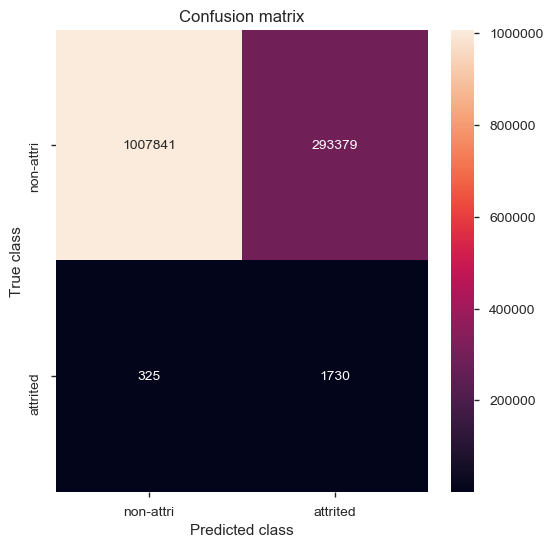

In [72]:
LABELS = ["non-attri","attrited"]
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [63]:
#from sklearn.metrics import classification_report
print(classification_report(sy_test, logregpred))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87   1301220
           1       0.01      0.84      0.01      2055

    accuracy                           0.77   1303275
   macro avg       0.50      0.81      0.44   1303275
weighted avg       1.00      0.77      0.87   1303275



In [64]:
import gc
gc.collect()

24448

In [65]:
logPredictions=logreg.predict_proba(sX_test)[:,1]

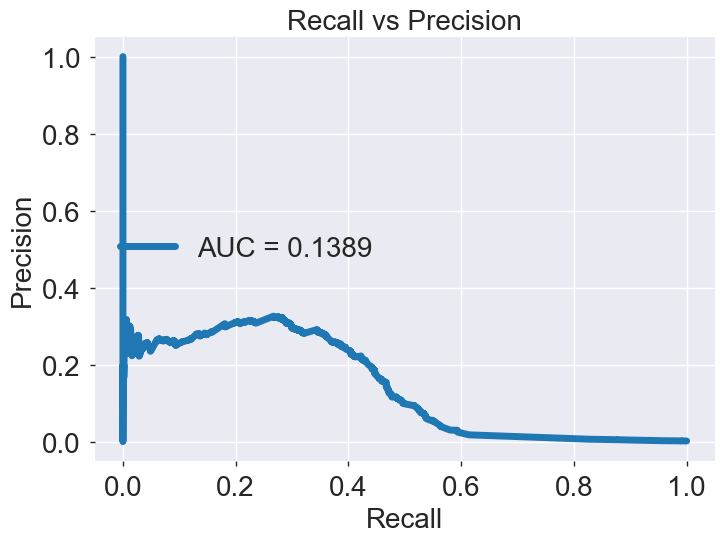

In [68]:

precision_rt, recall_rt, threshold_rt = precision_recall_curve(sy_test, logPredictions)
pr_auc = auc(recall_rt, precision_rt)
fig, ax = plt.subplots()
plt.tick_params(axis='both', labelsize=20)
ax.plot(recall_rt, precision_rt, linewidth=5, label='AUC = %0.4f'% pr_auc)
#ax.hlines(no_skill_level, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='No-Skill Line')
ax.legend(loc='center left',fontsize=20)
plt.title('Recall vs Precision',fontsize=20)
plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precision',fontsize=20)
plt.show()

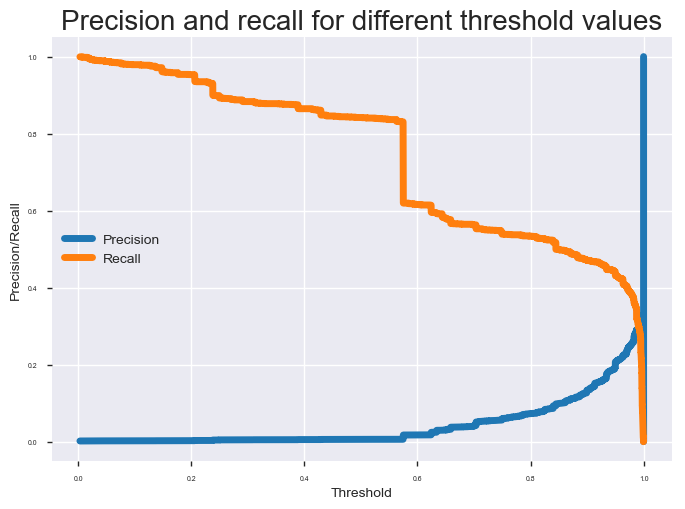

In [71]:
#plt.xticks(fontsize=40)
plt.tick_params(axis='both', labelsize=5)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values',fontsize=20)
plt.xlabel('Threshold',fontsize=10)
plt.ylabel('Precision/Recall',fontsize=10)
plt.legend(fontsize=10)
plt.show()

## Decision tree estimate

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtree = DecisionTreeClassifier( random_state=10).fit(os_data_X,os_data_y)

In [75]:
dtreepred = dtree.predict(sX_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(dtree.score(sX_test, sy_test)))

Accuracy of random forest classifier on test set: 0.79


In [76]:
print(confusion_matrix(sy_test, dtreepred))

[[1027310  273910]
 [    552    1503]]


In [77]:
print(classification_report(sy_test, dtreepred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88   1301220
           1       0.01      0.73      0.01      2055

    accuracy                           0.79   1303275
   macro avg       0.50      0.76      0.45   1303275
weighted avg       1.00      0.79      0.88   1303275



In [31]:
#from sklearn.tree import plot_tree

In [32]:
#plot_tree(dtree, filled=True)

In [33]:
#feat_importance = dtree.tree_.compute_feature_importances(normalize=False)
#print("feat importance = " + str(feat_importance))

In [78]:
print(dict(zip(sX_test.columns, dtree.feature_importances_)))

{'mob002': 0.0008741796490699191, 'mob053': 0.00852356271698433, 'mob081': 0.0012036650677089186, 'mob109': 0.02854846841642174, 'trn008': 0.05128823849238492, 'trn144': 0.18705973671245277, 'tsy180': 0.13406287986925972, 'tsy189': 0.017410666480804853, 'mob033': 0.0028026258586302403, 'trn155': 0.013754838860775944, 'mob025': 0.0034340116165496137, 'trn129': 0.010097351318307222, 'trn142': 0.00219670561882292, 'trn143': 0.006905979637608095, 'act073': 0.0029388639548361063, 'act033': 0.006045995257460442, 'ivr065': 0.0006832273064002593, 'trn126': 0.004177888997396123, 'ivr013': 0.0012570311588534272, 'ivr076': 0.06651091922504795, 'act041': 0.015181004100027982, 'trn053': 0.0024513625796616987, 'trn031': 0.41309352639622965, 'trn040': 0.00017997618413327537, 'ivr026': 0.0006928018484403767, 'trn038': 0.0018746277007642377, 'trn054': 0.002176616640511046, 'ivr024': 0.0012654696584513932, 'trn266': 0.0003914174214240882, 'sr482': 0.002229133677448993, 'trn060': 0.0017584297290624102, '

In [ ]:
# add in desc. for plotting --- load event_mapping sheet

In [93]:
evmap=pd.read_csv('..\event_mapping.csv', encoding='ISO-8859-1',sep=",")

In [126]:
evmap['event_name1']=evmap['nbr_text']+" "+evmap['event_name']

In [127]:
evmap.head()

,event_name,nbr_text,event_name1
0,done.compliance.,act001,act001 done.compliance.
1,done.compliance.review,act002,act002 done.compliance.review
2,done.compliance.review:pre-work,act003,act003 done.compliance.review:pre-work
3,done.compliance.security/verification,act004,act004 done.compliance.security/verification
4,done.correspondence-inactive.,act005,act005 done.correspondence-inactive.


In [128]:
evmap1=evmap.set_index('nbr_text')

In [129]:
test=sX_test.columns.to_series()

In [130]:
evlabel=test.to_frame().join(evmap1)

In [131]:
evlabel.head()

,0,event_name,event_name1
mob002,mob002,activateuserrealms,mob002 activateuserrealms
mob053,mob053,getmysummary,mob053 getmysummary
mob081,mob081,keepalive,mob081 keepalive
mob109,mob109,signout,mob109 signout
trn008,trn008,billpay,trn008 billpay


In [132]:
featimp=dict(zip(evlabel['event_name1'], dtree.feature_importances_))

In [133]:
featimps=sorted(featimp.items(),key=lambda kv:kv[1], reverse=True)

In [134]:
featimps

[('trn031 close_blank', 0.41309352639622965),
 ('trn144 inquiries_account_history', 0.18705973671245277),
 ('tsy180 triad_cda', 0.13406287986925972),
 ('ivr076 transferred_to_agentsuccessful_transfer_with_cti_data.',
  0.06651091922504795),
 ('trn008 billpay', 0.05128823849238492),
 ('mob109 signout', 0.02854846841642174),
 ('tsy189 unofficial_payoff_request', 0.017410666480804853),
 ('act041 done.directbankingcontact.manualauthentication',
  0.015181004100027982),
 ('trn155 inquiries_transaction_history', 0.013754838860775944),
 ('trn129 inquiries_3_linked_accounts', 0.010097351318307222),
 ('mob053 getmysummary', 0.00852356271698433),
 ('trn143 inquiries_account_details', 0.006905979637608095),
 ('act033 done.directbankingcontact.', 0.006045995257460442),
 ('trn126 inquiries_14_account_details', 0.004177888997396123),
 ('mob025 getbankaccountdetails', 0.0034340116165496137),
 ('act073 done_fulfill/complete.customercontact.salesandservicelead',
  0.0029388639548361063),
 ('mob033 getc

In [135]:
#features = sX_test.columns
features = evlabel['event_name1']
importances = dtree.feature_importances_
indices = np.argsort(importances)

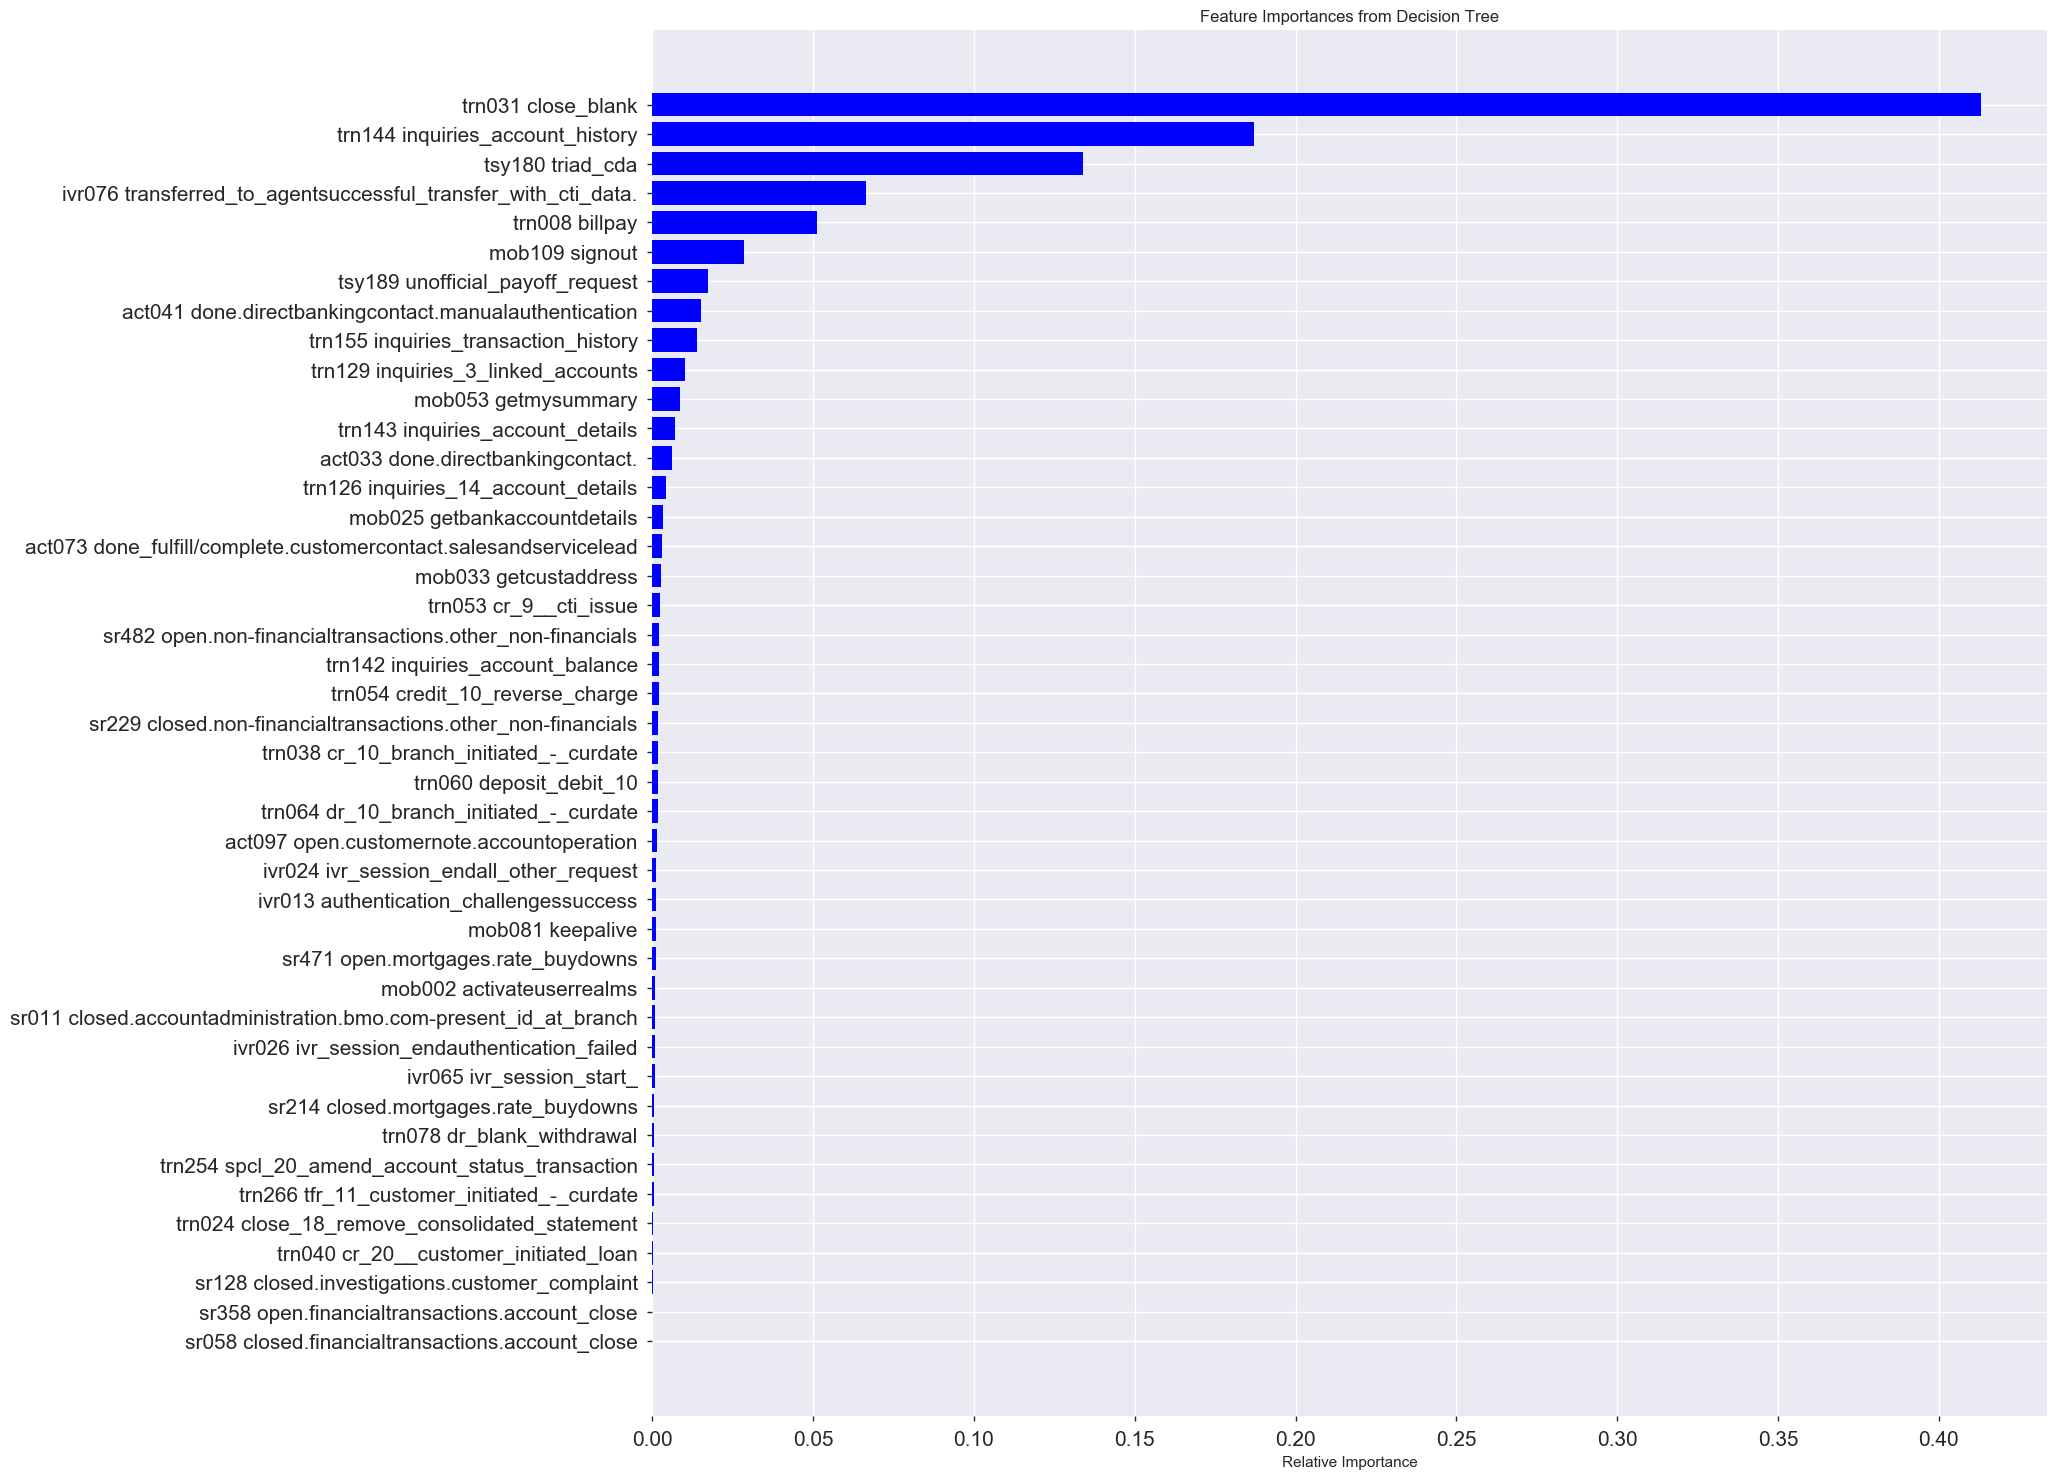

In [142]:

plt.figure(figsize=(18, 18))
plt.tick_params(axis='both', labelsize=15)
plt.title('Feature Importances from Decision Tree')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

tsy180 :triad_cda
mob027 : getbannerad
tsy189: unofficial_payoff_request
ivr076: transferred_to_agentsuccessful_transfer_with_cti_data
tsy182:triad_credit_facilities
mob053: getmysummary
hub001: arrival_event
act041: done.directbankingcontact.manualauthentication

In [145]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [ ]:
#use only the first 10 to view the tree plot

In [146]:
os_data_X_small=os_data_X[['trn031','trn144','tsy180','ivr076','trn008','mob109','tsy189','act041','trn155','trn129']]

In [149]:
sX_test_small=sX_test[['trn031','trn144','tsy180','ivr076','trn008','mob109','tsy189','act041','trn155','trn129']]

In [147]:
dtree_small = DecisionTreeClassifier( random_state=10).fit(os_data_X_small,os_data_y)

In [153]:
dtreepred_small = dtree_small.predict(os_data_X_small)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtree_small.score(sX_test_small, sy_test)))

Accuracy of decision tree classifier on test set: 0.78


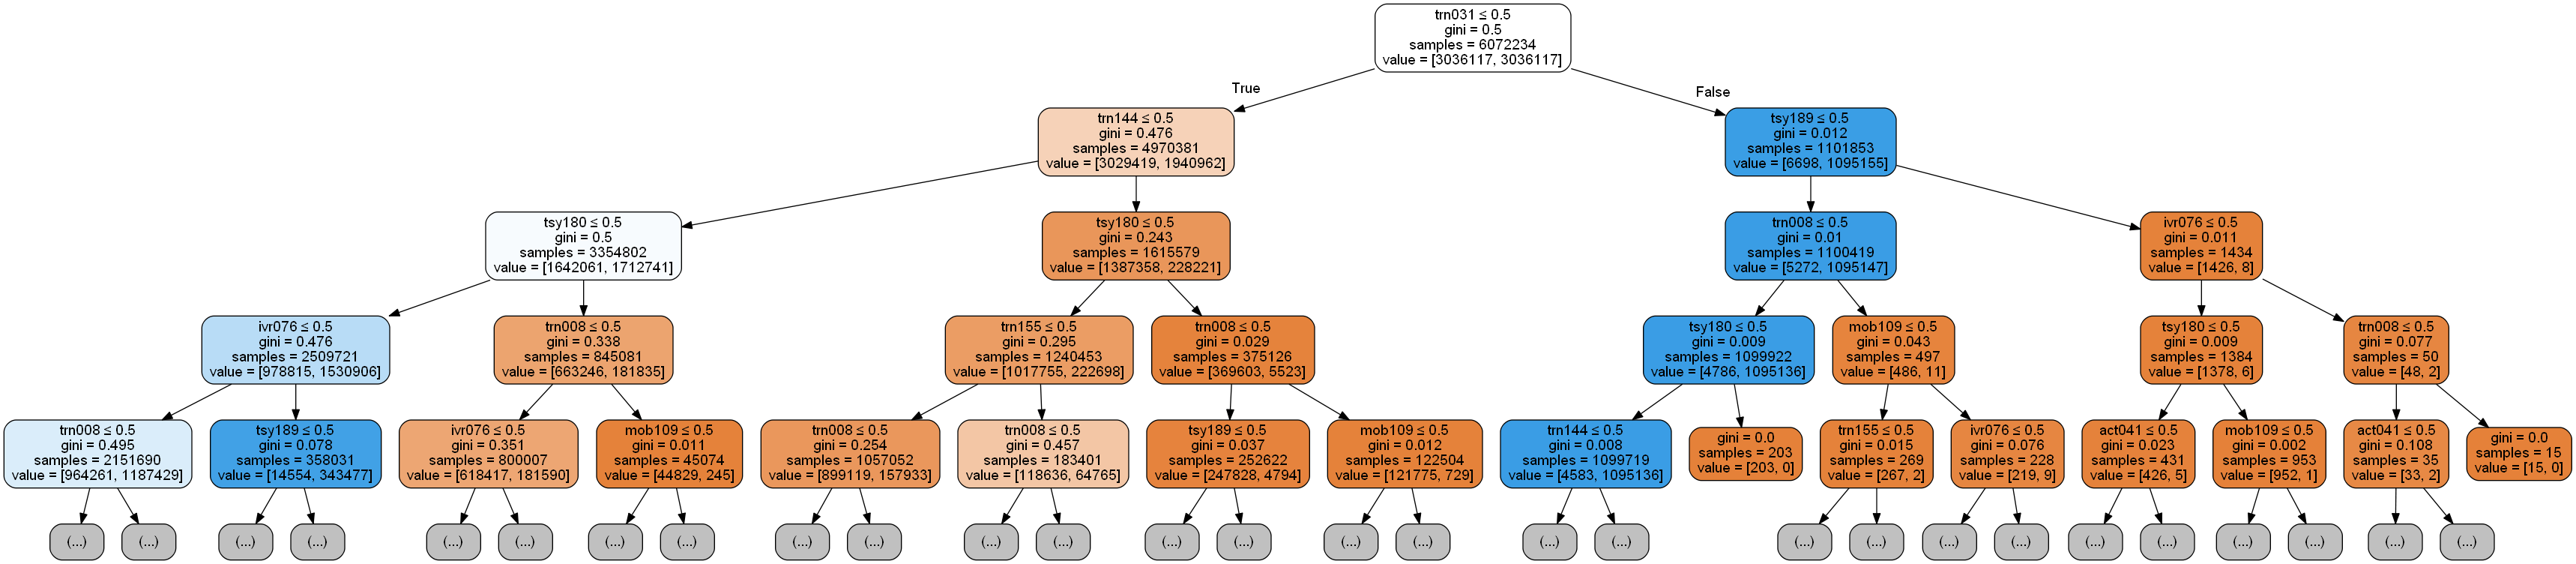

In [177]:
dot_data = StringIO()
export_graphviz(dtree_small, out_file=dot_data, feature_names= sX_test_small.columns,
                filled=True, rounded=True,label='all',max_depth=4,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [178]:
graph.write_png('dtree_small.png')

True

In [160]:
#from IPython.display import Image
#Image(filename='dtree.png') 

<img src="dtree.png" style="width: 500;  height=500"/>

In [169]:
'''
plt.figure(figsize=(150, 100))

plot_tree(dtree_small, filled=True,label='all',max_depth=5)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('treetest.png')
plt.show()

'''

"\nplt.figure(figsize=(150, 100))\n\nplot_tree(dtree_small, filled=True,label='all',max_depth=5)\nfig = plt.gcf()\nfig.set_size_inches(150, 100)\nfig.savefig('treetest.png')\nplt.show()\n\n"

In [ ]:
'''
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
        
'''        

## random forest estimate

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
randF = RandomForestClassifier(n_estimators=100,  random_state=10).fit(os_data_X,os_data_y)

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [180]:
y_pred = randF.predict(sX_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randF.score(sX_test, sy_test)))

Accuracy of random forest classifier on test set: 0.79


In [181]:
print(confusion_matrix(sy_test, y_pred))

[[1027399  273821]
 [    547    1508]]


In [182]:
print(classification_report(sy_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88   1301220
           1       0.01      0.73      0.01      2055

    accuracy                           0.79   1303275
   macro avg       0.50      0.76      0.45   1303275
weighted avg       1.00      0.79      0.88   1303275



In [183]:
features = sX_test.columns

In [184]:
features

Index(['mob002', 'mob053', 'mob081', 'mob109', 'trn008', 'trn144', 'tsy180',
       'tsy189', 'mob033', 'trn155', 'mob025', 'trn129', 'trn142', 'trn143',
       'act073', 'act033', 'ivr065', 'trn126', 'ivr013', 'ivr076', 'act041',
       'trn053', 'trn031', 'trn040', 'ivr026', 'trn038', 'trn054', 'ivr024',
       'trn266', 'sr482', 'trn060', 'trn254', 'sr229', 'trn064', 'act097',
       'trn078', 'trn024', 'sr058', 'sr128', 'sr358', 'sr214', 'sr011',
       'sr471'],
      dtype='object')

In [185]:
importances = randF.feature_importances_

In [186]:
indices = np.argsort(importances)

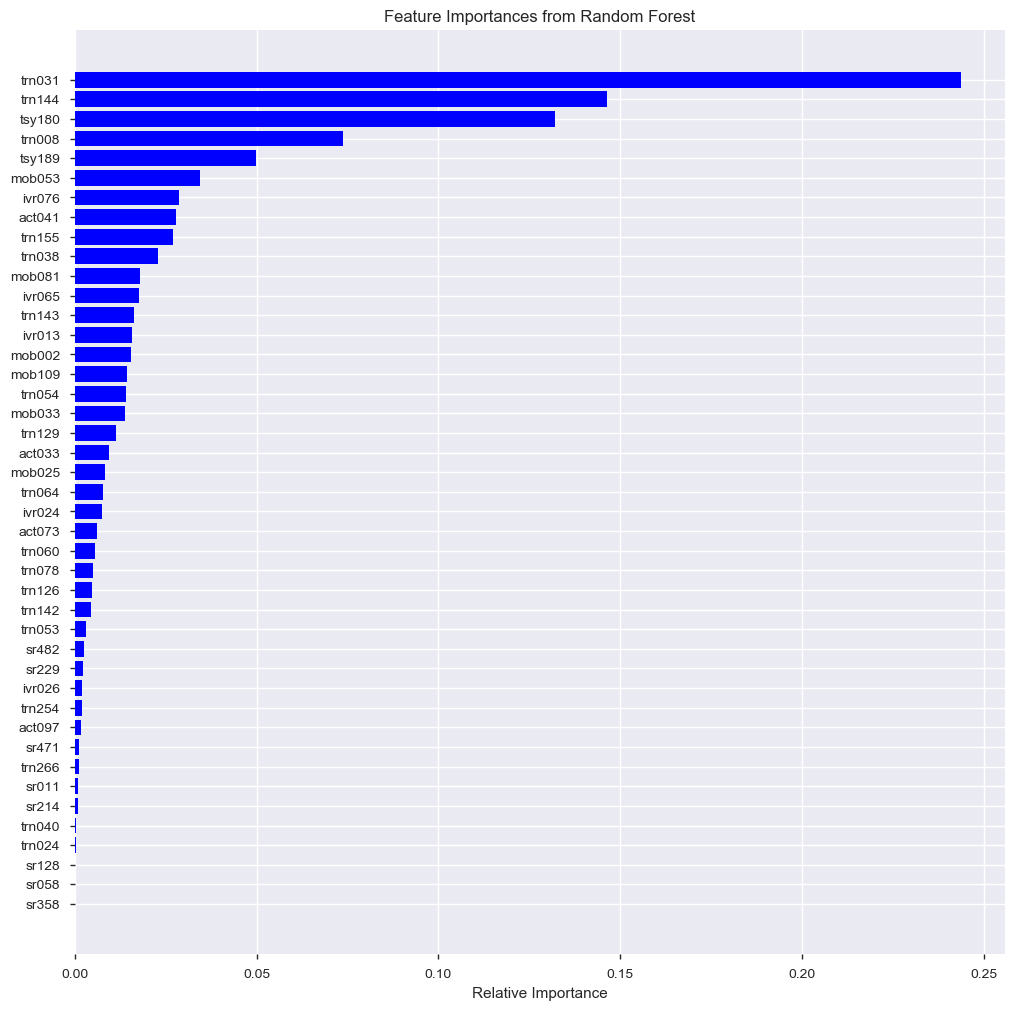

In [187]:
plt.figure(figsize=(12, 12))
plt.title('Feature Importances from Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [188]:
#from sklearn.tree import export_graphviz

In [189]:
#estimator = randF.estimators_[5]

In [190]:
#os_data_X.columns

In [191]:
#os_data_y.values

In [192]:
'''export_graphviz(estimator, 
                out_file='forest.png', 
                feature_names = os_data_X.columns,
                class_names =True ,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
                '''

"export_graphviz(estimator, \n                out_file='forest.png', \n                feature_names = os_data_X.columns,\n                class_names =True ,\n                rounded = True, proportion = False, \n                precision = 2, filled = True)\n                "

In [193]:

#from sklearn.tree import DecisionTreeClassifier, plot_tree

In [194]:
# Parameters
#n_classes = 2
#plot_colors = "ryb"
#plot_step = 0.02

In [195]:
'''
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    #X = iris.data[:, pair]
    #y = iris.target

    # Train
    #clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()
'''

'\nfor pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],\n                                [1, 2], [1, 3], [2, 3]]):\n    # We only take the two corresponding features\n    #X = iris.data[:, pair]\n    #y = iris.target\n\n    # Train\n    #clf = DecisionTreeClassifier().fit(X, y)\n\n    # Plot the decision boundary\n    plt.subplot(2, 3, pairidx + 1)\n\n    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1\n    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1\n    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),\n                         np.arange(y_min, y_max, plot_step))\n    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)\n\n    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])\n    Z = Z.reshape(xx.shape)\n    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)\n\n    plt.xlabel(iris.feature_names[pair[0]])\n    plt.ylabel(iris.feature_names[pair[1]])\n\n    # Plot the training points\n    for i, color in zip(range(n_classes), plot_colors):\n        idx = np.where(y == i)\n

## GradientBoostingClassifier

In [196]:
from sklearn.ensemble import GradientBoostingClassifier

In [197]:
gradB = GradientBoostingClassifier( random_state=10).fit(os_data_X,os_data_y)

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [198]:
gb_pred = gradB.predict(sX_test)
print('Accuracy of gradient Boosting classifier on test set: {:.2f}'.format(randF.score(sX_test, sy_test)))

Accuracy of gradient Boosting classifier on test set: 0.79


In [199]:
print(confusion_matrix(sy_test, gb_pred))

[[1026592  274628]
 [    351    1704]]


In [200]:
print(classification_report(sy_test, gb_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88   1301220
           1       0.01      0.83      0.01      2055

    accuracy                           0.79   1303275
   macro avg       0.50      0.81      0.45   1303275
weighted avg       1.00      0.79      0.88   1303275



## Xgboost

In [155]:
import xgboost

In [55]:
#from xgboost import XGBClassifiers

In [ ]:
#xgb = XGBClassifier().fit(os_data_X1,os_data_y)

## create profile report


In [97]:
pandasreport=pandprof.ProfileReport(univ)

In [98]:
pandasreport.to_file("Sequence_Embedding_Quick_EDA.html")

In [ ]:
# undersampled data experiment predict

In [60]:
'''
for x in range(3):
    #start_time = timeit.default_timer()
    tpot.fit(X_train,y_train)
    #elapsed = timeit.default_timer() - start_time
    #times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(x_test1,y_test))
    name='tpot_ames'+str(x)+'.py'
    tpot.export(name)
'''    

"\nfor x in range(3):\n    #start_time = timeit.default_timer()\n    tpot.fit(X_train,y_train)\n    #elapsed = timeit.default_timer() - start_time\n    #times.append(elapsed)\n    winning_pipes.append(tpot.fitted_pipeline_)\n    scores.append(tpot.score(x_test1,y_test))\n    name='tpot_ames'+str(x)+'.py'\n    tpot.export(name)\n"